In [5]:
#  Install dependencies (Run only once in Colab/Notebook)
!pip install nltk scikit-learn matplotlib seaborn --quiet

#  Imports
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [6]:
#  Load and shuffle data
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

#  Convert to DataFrame
data = pd.DataFrame(documents, columns=["review", "label"])

#  Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['review'], data['label'], test_size=0.2, random_state=42)

In [7]:
#  Vectorization
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#  Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

#  Predictions
y_pred = model.predict(X_test_vec)

#  Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         neg       0.80      0.85      0.82       190
         pos       0.86      0.80      0.83       210

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



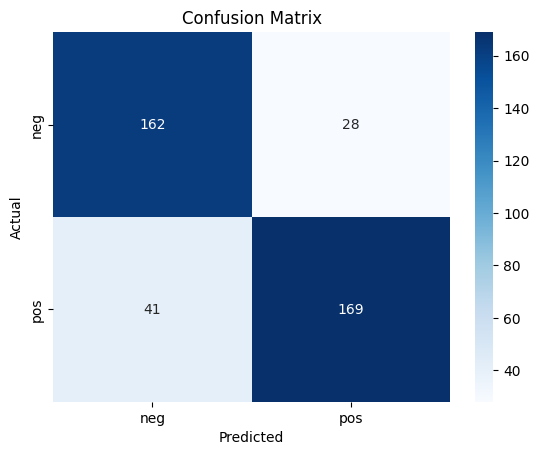

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
#  Try it out
samples = [
    "Absolutely fantastic movie with brilliant acting and storyline!",
    "Terrible plot. I walked out halfway through. Waste of time.",
    "It was okay, some parts were good but overall forgettable.",
    "I loved the cinematography and direction, very well made!",
    "Bad acting, poor dialogues, and no sense of story at all.",
    "A beautiful and emotional film that stays with you long after."
]

for i, review in enumerate(samples, 1):
    sentiment = predict_sentiment(review)
    print(f"{i}. Review: \"{review}\"\n   ➤ Predicted Sentiment: {sentiment.upper()}\n")

1. Review: "Absolutely fantastic movie with brilliant acting and storyline!"
   ➤ Predicted Sentiment: POS

2. Review: "Terrible plot. I walked out halfway through. Waste of time."
   ➤ Predicted Sentiment: NEG

3. Review: "It was okay, some parts were good but overall forgettable."
   ➤ Predicted Sentiment: POS

4. Review: "I loved the cinematography and direction, very well made!"
   ➤ Predicted Sentiment: POS

5. Review: "Bad acting, poor dialogues, and no sense of story at all."
   ➤ Predicted Sentiment: NEG

6. Review: "A beautiful and emotional film that stays with you long after."
   ➤ Predicted Sentiment: POS

